# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
df = pd.read_csv("../data/Wholesale customers data.csv")

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

<font color='blue'>General overview of the dataset:
</font>

In [3]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

<font color='blue'>Descriptive info of the numerical vars:
</font>

In [4]:
df.describe().T

count          mean           std   min      25%     50%  \
Channel           440.0      1.322727      0.468052   1.0     1.00     1.0   
Region            440.0      2.543182      0.774272   1.0     2.00     3.0   
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Channel               2.00       2.0  
Region                3.00       3.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicassen         1820.25   47943.0

<font color='blue'>Info about data types and nulls:
</font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<font color='blue'>Correlation Matrix and Heatmap:
</font>

In [7]:
corr = df.corr()

In [8]:
corr

Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641    0.205497  
Frozen                   -0.131525    0.390947  
Detergents_Paper          1.000000    0.069291  
Delicassen                0.069291    1.000000

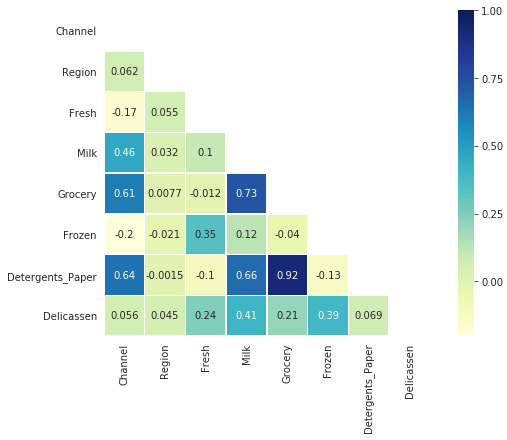

In [9]:
plt.figure(figsize=(10,6))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True, cmap="YlGnBu", linewidths=.5, annot=True)

<font color='blue'> Descriptive statistics:
</font>

In [10]:
df.describe().T

count          mean           std   min      25%     50%  \
Channel           440.0      1.322727      0.468052   1.0     1.00     1.0   
Region            440.0      2.543182      0.774272   1.0     2.00     3.0   
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Channel               2.00       2.0  
Region                3.00       3.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicassen         1820.25   47943.0

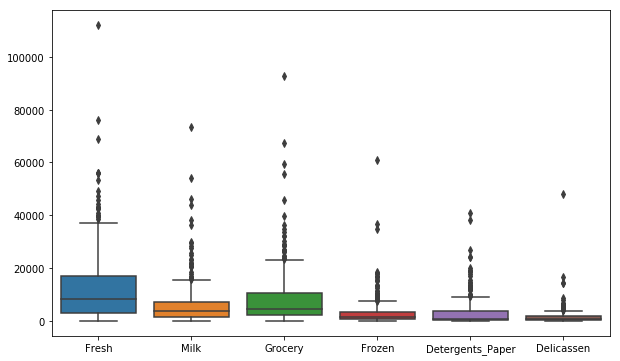

In [11]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df.iloc[:,2:])

<font color='blue'>It seams there are some outliers, I will fond them and delete them
</font>

In [12]:
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    # Generate outliers
    anomalies = []
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

<font color='blue'>The oultiers:
</font>

In [13]:
for column in df.iloc[:,2:]:
    print(f'{column}: {find_anomalies(df[column])}')

Fresh: [56159, 56082, 76237, 112151, 56083, 53205, 68951]
Milk: [36423, 54259, 29892, 38369, 46197, 73498, 29627, 43950, 28326]
Grocery: [55571, 59598, 45828, 92780, 39694, 36486, 67298]
Frozen: [35009, 18028, 36534, 18711, 60869, 17866]
Detergents_Paper: [24171, 17740, 26701, 24231, 40827, 20070, 18906, 19410, 18594, 38102]
Delicassen: [16523, 14472, 14351, 47943]


<font color='blue'> I make a list with the index of the outliers
</font>

In [14]:
out_index = []
for column in df.iloc[:,2:]:
    anomalies = find_anomalies(df[column])
    for anomalie in anomalies:
        out_index.append(df.loc[(df[column] == anomalie)].index[0])
out_index = list(set(out_index)) #keep only one of each
out_index.sort()
print(out_index)

[23, 39, 47, 56, 61, 65, 71, 85, 86, 87, 92, 93, 103, 125, 181, 183, 196, 211, 216, 251, 258, 259, 284, 325, 333, 413]


<font color='blue'>Delete rows with index in out_index
</font>

In [15]:
df = df.drop(out_index)

In [16]:
df.iloc[21:24,:] #check if the outliers have been deleted

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
21        1       3   5567   871     2010    3383               375   
22        1       3  31276  1917     4469    9408              2381   
24        2       3  22647  9776    13792    2915              4482   

    Delicassen  
21         569  
22        4334  
24        5778

<font color='blue'>Visualize distributions:
</font>

In [17]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

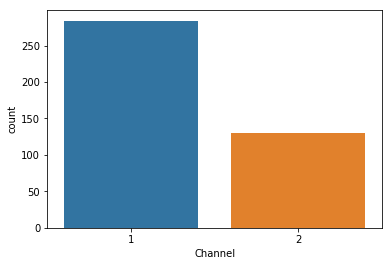

In [18]:
sns.countplot(df.Channel)
plt.show()

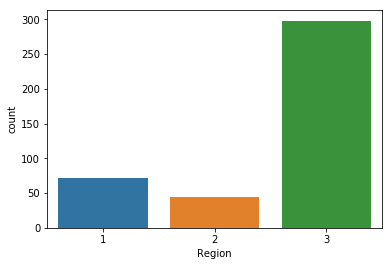

In [19]:
sns.countplot(df.Region)
plt.show()

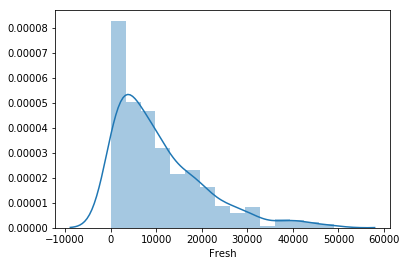

In [20]:
sns.distplot(df.Fresh)
plt.show() 

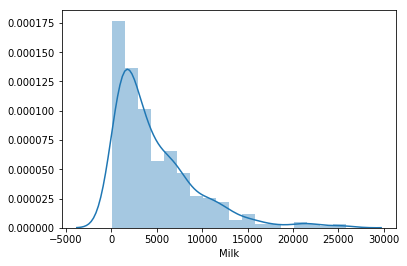

In [21]:
sns.distplot(df.Milk)
plt.show() 

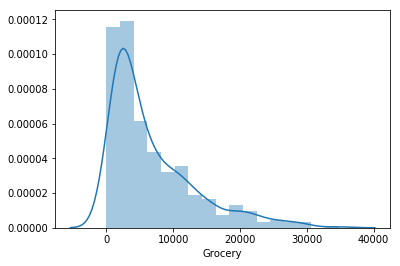

In [22]:
sns.distplot(df.Grocery)
plt.show() 

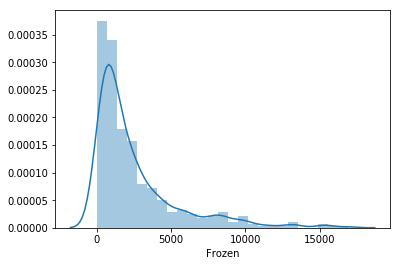

In [23]:
sns.distplot(df.Frozen)
plt.show() 

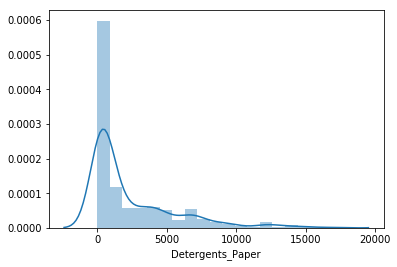

In [24]:
sns.distplot(df.Detergents_Paper)
plt.show() 

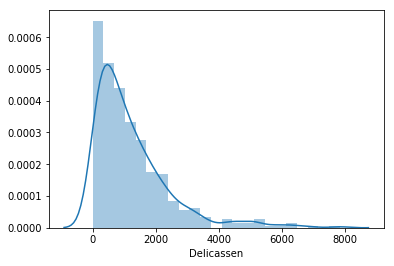

In [25]:
sns.distplot(df.Delicassen)
plt.show()

<font color='blue'>**COMMENTS**:<br>
**1.-What does each column mean?**<br>
CHANNEL: customers Channel - Horeca or Retail (Nominal)<br>
REGION: customer Region: Lisbon, Oporto or Other (Nominal)<br>
FRESH: annual spending (m.u.) on fresh products (Continuous)<br>
MILK: annual spending (m.u.) on milk products (Continuous)<br>
GROCERY: annual spending (m.u.)on grocery products (Continuous)<br>
FROZEN: annual spending (m.u.)on frozen products (Continuous)<br>
DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)<br>
DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)<br>

2.-Any categorical data to convert?<br>
No<br>

3.-Any missing data to remove?<br>
No<br>

4.-Column collinearity - any high correlations?<br>
Detergent_Paper and Grocery have high correlation

5.-Descriptive statistics - any outliers to remove?<br>
There are some outliers, we have deleted, them

6.-Column-wise data distribution - is the distribution skewed?<br>
The numerical variables are mainly right skewed. We should standirize the variables
</font>

<font color='blue'>PARETO:
</font>

In [26]:
#Finally I do not use this plot
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()


In [27]:
df_pareto = df.copy()

In [28]:
df_pareto.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [29]:
df_pareto['Total'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum(axis=1)

In [30]:
df_pareto.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Total  
0        1338  34112  
1        1776  33266  
2        7844  36610  
3        1788  27381  
4        5185  46100

In [31]:
total = df_pareto['Total'].sum()
total_80 = total * 0.8

In [32]:
print(f'Total sales of the dataset {total}')
print(f'80% sales of the dataset {total_80}')

Total sales of the dataset 11823407
80% sales of the dataset 9458725.6


In [33]:
df_pareto = df_pareto.sort_values(by='Total', ascending=False)

In [34]:
df_pareto.head()

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
145        2       3  22039   8384    34792      42             12591   
437        2       3  14531  15488    30243     437             14841   
435        1       3  29703  12051    16027   13135               182   
49         2       3   4967  21412    28921    1798             13583   
427        1       3  31012  16687     5429   15082               439   

     Delicassen  Total  
145        4430  82278  
437        1867  77407  
435        2204  73302  
49         1163  71844  
427        1163  69812

In [35]:
rows_80 = 0
acumulated = 0
for item in df_pareto['Total']:
    if acumulated <= total_80:
        acumulated += item
        rows_80 += 1
    else:
        pass
rows_80        

249

In [36]:
df_pareto.shape[0]

414

In [37]:
print(f'The 80% of the total is brought by the {(rows_80/df_pareto.shape[0])*100}% of the rows')

The 80% of the total is brought by the 60.14492753623188% of the rows


<font color='blue'>In this particular case it seems Pareto Law is not applying.
</font>

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

<font color='blue'>The columns with high correlation are Detergent_Paper and Grocery. So we can drop one of the columns. I will delete Grocery as it also quite related to Milk.
</font>


In [38]:
df.drop(columns='Grocery', inplace=True)

In [39]:
df.head()

Channel  Region  Fresh  Milk  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     214              2674        1338
1        2       3   7057  9810    1762              3293        1776
2        2       3   6353  8808    2405              3516        7844
3        1       3  13265  1196    6404               507        1788
4        2       3  22615  5410    3915              1777        5185

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

<font color='blue'> I will standarize to solve the skewed right situation of the numeric columns
</font>

In [40]:
from sklearn import preprocessing


<font color='blue'>We scale the numeric columns, that is all except for the Region and the Channel
</font>

In [41]:
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
customers_scale = pd.DataFrame(scaled_df, columns=names)

In [42]:
customers_scale.head()

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
0  1.478044  0.587722  0.199569  1.051409 -0.801844          0.093798   
1  1.478044  0.587722 -0.372655  1.085254 -0.270462          0.286944   
2  1.478044  0.587722 -0.444438  0.865042 -0.049739          0.356526   
3 -0.676570  0.587722  0.260340 -0.807866  1.322997         -0.582369   
4  1.478044  0.587722  1.213706  0.118255  0.468598         -0.186092   

   Delicassen  
0    0.082291  
1    0.442510  
2    5.432937  
3    0.452379  
4    3.246130

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [43]:
# Your code here:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

In [44]:
# Your code here:
customers_clusters = kmeans.fit(customers_scale)
customers_clusters.cluster_centers_

array([[-0.52081441,  0.07039335,  1.16694369, -0.06070853,  1.29448538,
        -0.52786915,  0.50550921],
       [-0.64549348, -0.10039143, -0.26343305, -0.51529612, -0.26190165,
        -0.50372266, -0.34232101],
       [ 1.44301007,  0.12226642, -0.34196952,  0.91236099, -0.43062393,
         1.20802807,  0.23776833]])

In [45]:
customers_scale['labels'] = customers_clusters.fit_predict(customers_scale)

In [46]:
customers_scale.head()

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
0  1.478044  0.587722  0.199569  1.051409 -0.801844          0.093798   
1  1.478044  0.587722 -0.372655  1.085254 -0.270462          0.286944   
2  1.478044  0.587722 -0.444438  0.865042 -0.049739          0.356526   
3 -0.676570  0.587722  0.260340 -0.807866  1.322997         -0.582369   
4  1.478044  0.587722  1.213706  0.118255  0.468598         -0.186092   

   Delicassen  labels  
0    0.082291       2  
1    0.442510       2  
2    5.432937       2  
3    0.452379       0  
4    3.246130       0

Count the values in `labels`.

In [47]:
customers_scale.labels.value_counts()

1    208
2    123
0     83
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [48]:
# Your code here
from sklearn.cluster import DBSCAN
#I fit the model only with the data, not the labels from K means
dbscan = DBSCAN(eps=0.5).fit(customers_scale.iloc[:,:-2])

In [49]:
customers_scale['labels_DBSCAN'] = dbscan.labels_

In [50]:
customers_scale.head()

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
0  1.478044  0.587722  0.199569  1.051409 -0.801844          0.093798   
1  1.478044  0.587722 -0.372655  1.085254 -0.270462          0.286944   
2  1.478044  0.587722 -0.444438  0.865042 -0.049739          0.356526   
3 -0.676570  0.587722  0.260340 -0.807866  1.322997         -0.582369   
4  1.478044  0.587722  1.213706  0.118255  0.468598         -0.186092   

   Delicassen  labels  labels_DBSCAN  
0    0.082291       2             -1  
1    0.442510       2             -1  
2    5.432937       2             -1  
3    0.452379       0              2  
4    3.246130       0             -1

Count the values in `labels_DBSCAN`.

In [51]:
# Your code here
customers_scale.labels_DBSCAN.value_counts()

-1    250
 0    112
 5     13
 3      8
 1      7
 2      7
 6      6
 4      6
 7      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

In [52]:
def scater_pairs(df,x,y,labels):
    '''
    Draws a scatterplot for two columns of a dataframe, 
    using the labels of clustering for colour.
    INPUT <= df (dataframe), x (column for x axis), y (column for y axis) and labels 
    OUPUT => scatterplot
    '''
    plt.figure(figsize=(6, 6))
    c = df[labels]
    plt.scatter(df[x], df[y], c=c, alpha=0.5, marker='o')
    plt.title(f'Scatterplot Clusters {x} vs {y} for {labels}', fontsize='16')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

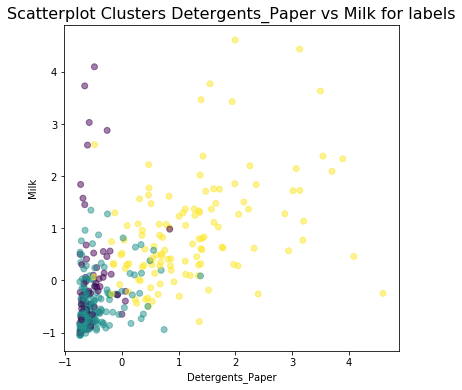

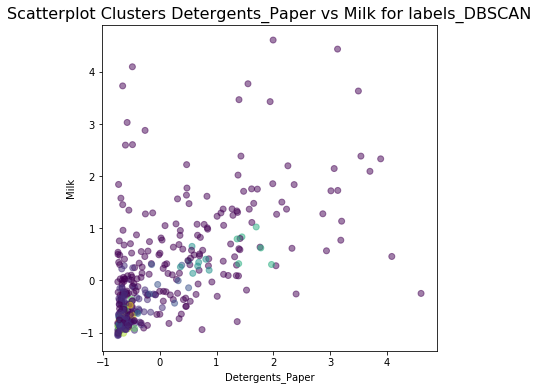

In [53]:
# Your code here:
scater_pairs(customers_scale,'Detergents_Paper','Milk','labels')
scater_pairs(customers_scale,'Detergents_Paper','Milk','labels_DBSCAN')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

<font color='blue'>As I deleted Grocery in the previous step I will use Delicatessen:
</font>

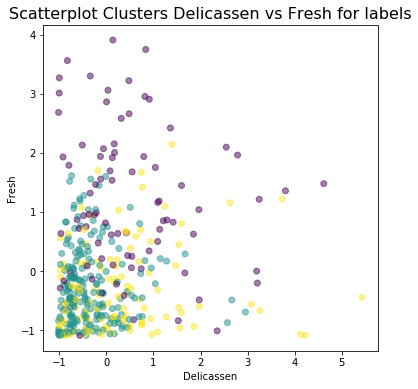

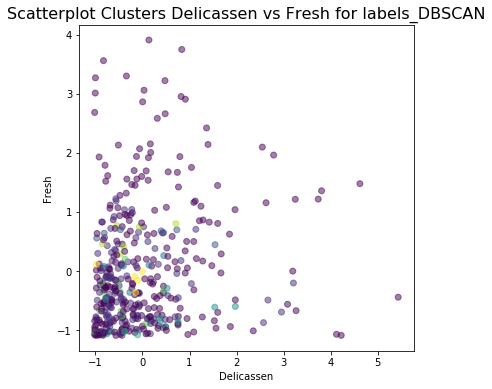

In [54]:
# Your code here:
scater_pairs(customers_scale,'Delicassen','Fresh','labels')
scater_pairs(customers_scale,'Delicassen','Fresh','labels_DBSCAN')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

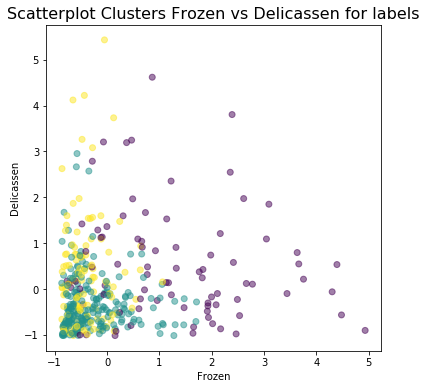

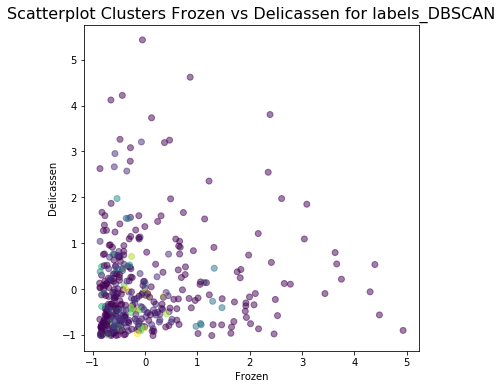

In [55]:
# Your code here:
scater_pairs(customers_scale,'Frozen','Delicassen','labels')
scater_pairs(customers_scale,'Frozen','Delicassen','labels_DBSCAN')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [56]:
# Your code here:
customers_scale.groupby('labels').mean()

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
labels                                                                       
0      -0.520814  0.070393  1.166944 -0.060709  1.294485         -0.527869   
1      -0.645493 -0.100391 -0.263433 -0.515296 -0.261902         -0.503723   
2       1.443010  0.122266 -0.341970  0.912361 -0.430624          1.208028   

        Delicassen  labels_DBSCAN  
labels                             
0         0.505509      -0.867470  
1        -0.342321       0.355769  
2         0.237768      -0.382114

In [57]:
customers_scale.groupby('labels_DBSCAN').mean()

Channel    Region     Fresh      Milk    Frozen  \
labels_DBSCAN                                                     
-1             0.262842 -0.161746  0.190233  0.354924  0.191838   
 0            -0.676570  0.587722 -0.326290 -0.641277 -0.344841   
 1             1.478044  0.587722  0.623041 -0.046480 -0.530661   
 2            -0.676570  0.587722 -0.062217 -0.668499  1.189760   
 3             1.478044  0.587722 -0.728969  0.330967 -0.469988   
 4             1.478044  0.587722 -1.040130  0.651350 -0.744232   
 5            -0.676570 -2.014598 -0.448289 -0.769169 -0.412998   
 6            -0.676570 -2.014598  0.579641 -0.868084 -0.048996   
 7            -0.676570 -0.713438 -0.103388 -0.650245 -0.012529   

               Detergents_Paper  Delicassen    labels  
labels_DBSCAN                                          
-1                     0.279174    0.159467  1.096000  
 0                    -0.588359   -0.277046  0.982143  
 1                     0.161152    0.123412  2.000000  
 2                    -0.621818   -0.347128  0.571429  
 3                     0.632438    0.624161  2.000000  
 4                     1.608075   -0.401290  2.000000  
 5                    -0.639278   -0.526044  1.000000  
 6                    -0.668125   -0.271348  1.000000  
 7                    -0.612261   -0.278092  1.000000

Which algorithm appears to perform better?

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


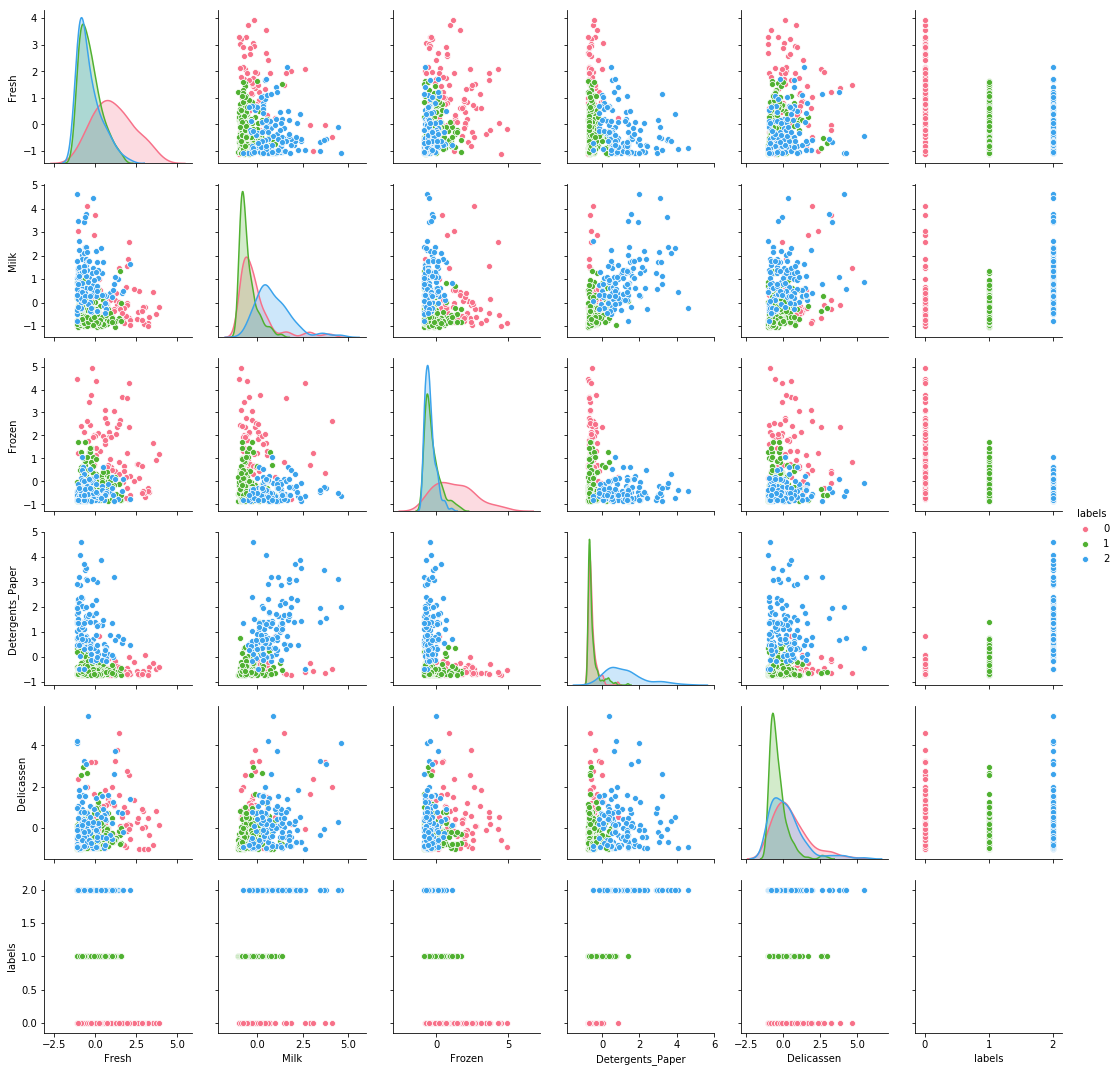

In [58]:
sns.pairplot(customers_scale.iloc[:,np.r_[2:8]], hue='labels', palette="husl")
plt.show()

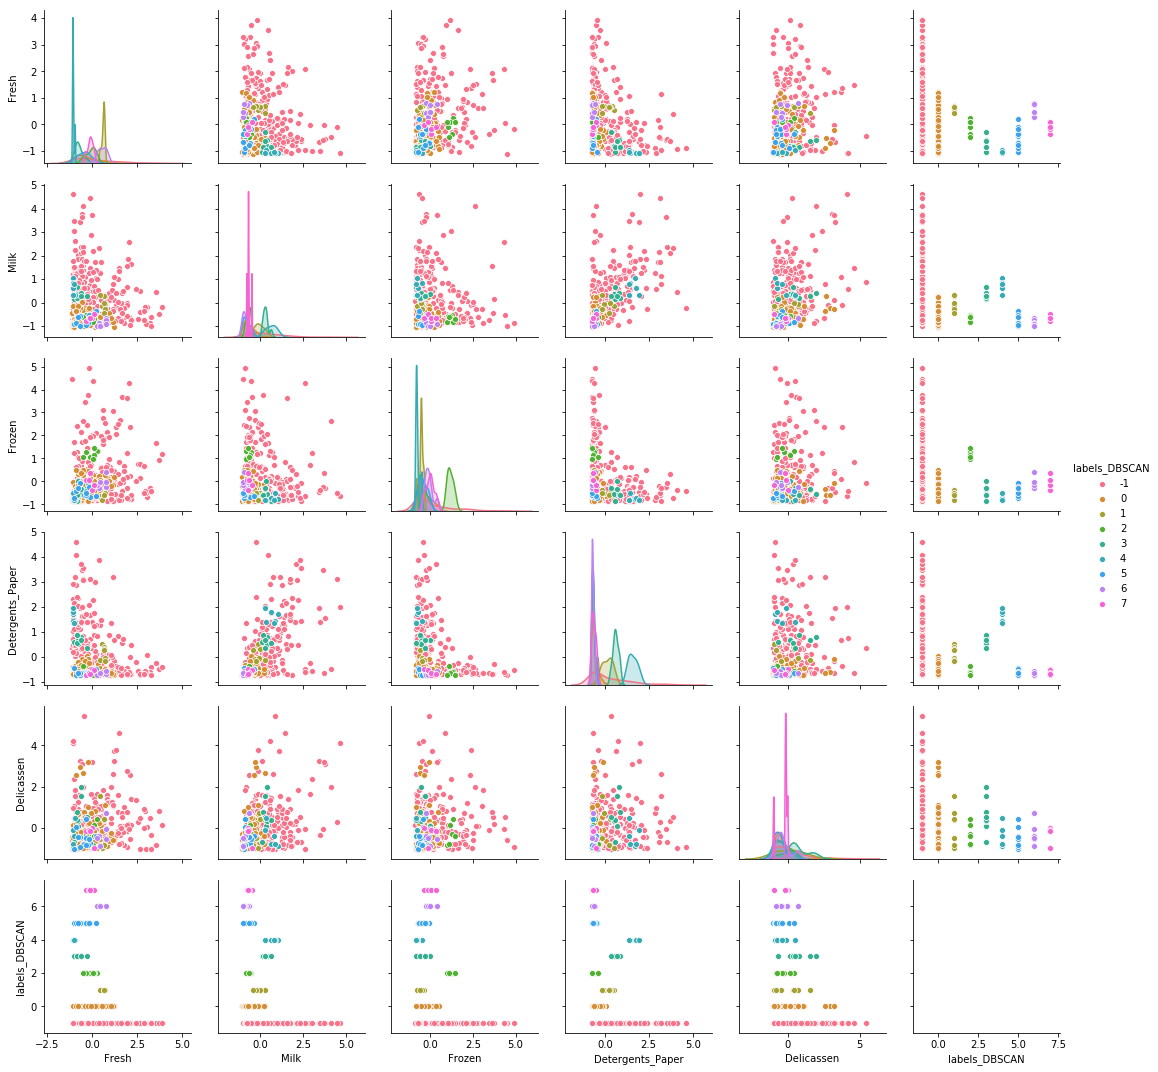

In [59]:
sns.pairplot(customers_scale.iloc[:,np.r_[2:7,8]], hue='labels_DBSCAN', palette="husl")
plt.show()

<font color='blue'> K Means seams to perform better
</font>

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [60]:
customers_scale_km = customers_scale.iloc[:,:7].copy()

In [61]:
customers_scale_km.head()

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
0  1.478044  0.587722  0.199569  1.051409 -0.801844          0.093798   
1  1.478044  0.587722 -0.372655  1.085254 -0.270462          0.286944   
2  1.478044  0.587722 -0.444438  0.865042 -0.049739          0.356526   
3 -0.676570  0.587722  0.260340 -0.807866  1.322997         -0.582369   
4  1.478044  0.587722  1.213706  0.118255  0.468598         -0.186092   

   Delicassen  
0    0.082291  
1    0.442510  
2    5.432937  
3    0.452379  
4    3.246130

<font color='blue'>Calculate the labels for k=2 to k=8
</font>

In [62]:
for i in range(2,9):
    kmeans = KMeans(n_clusters=i)
    customers_clusters_km = kmeans.fit(customers_scale_km.iloc[:,:7])
    customers_clusters_km.cluster_centers_
    ilabel = f'labels_{i}'
    customers_scale_km[ilabel] = customers_clusters_km.fit_predict(customers_scale_km.iloc[:,:7])

In [63]:
customers_scale_km.head()

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
0  1.478044  0.587722  0.199569  1.051409 -0.801844          0.093798   
1  1.478044  0.587722 -0.372655  1.085254 -0.270462          0.286944   
2  1.478044  0.587722 -0.444438  0.865042 -0.049739          0.356526   
3 -0.676570  0.587722  0.260340 -0.807866  1.322997         -0.582369   
4  1.478044  0.587722  1.213706  0.118255  0.468598         -0.186092   

   Delicassen  labels_2  labels_3  labels_4  labels_5  labels_6  labels_7  \
0    0.082291         1         2         1         1         2         5   
1    0.442510         1         2         1         1         2         5   
2    5.432937         1         2         1         4         3         0   
3    0.452379         0         1         3         3         0         3   
4    3.246130         1         1         3         4         3         0   

   labels_8  
0         1  
1         1  
2         7  
3         3  
4         7

In [64]:
for column in customers_scale_km.iloc[:,7:].columns:
    print(f'-------{column} value count-------')
    print(customers_scale_km[column].value_counts())

-------labels_2 value count-------
0    283
1    131
Name: labels_2, dtype: int64
-------labels_3 value count-------
0    208
2    123
1     83
Name: labels_3, dtype: int64
-------labels_4 value count-------
0    154
1    120
2     73
3     67
Name: labels_4, dtype: int64
-------labels_5 value count-------
0    146
1    115
2     73
3     60
4     20
Name: labels_5, dtype: int64
-------labels_6 value count-------
4    134
2    114
1     67
5     44
0     37
3     18
Name: labels_6, dtype: int64
-------labels_7 value count-------
6    133
5     69
4     68
2     45
1     44
3     37
0     18
Name: labels_7, dtype: int64
-------labels_8 value count-------
6    110
1     78
2     68
4     41
5     36
3     36
0     31
7     14
Name: labels_8, dtype: int64


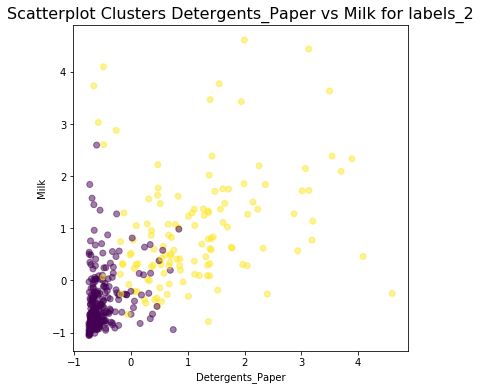

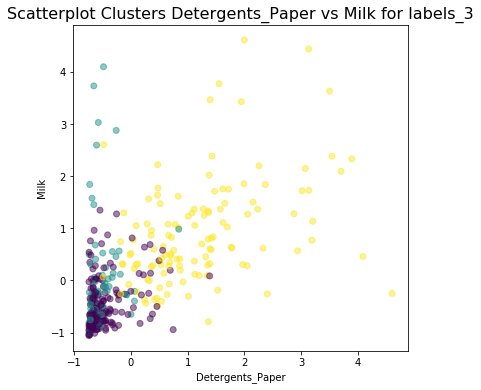

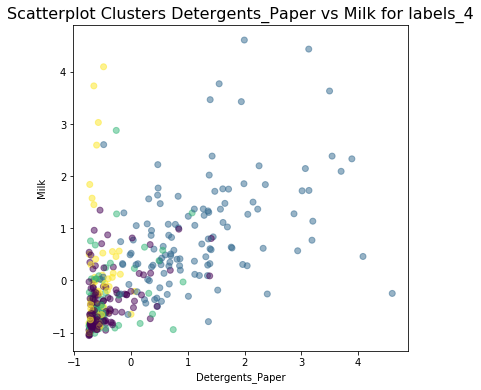

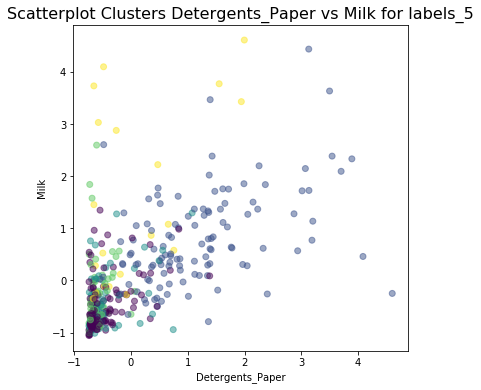

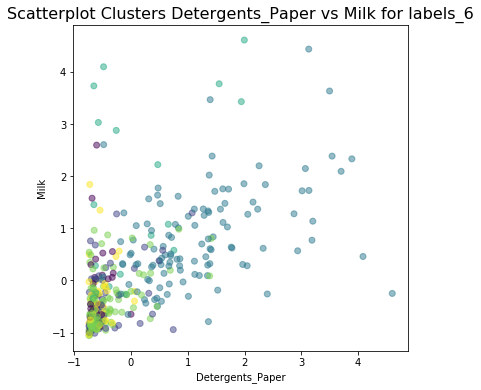

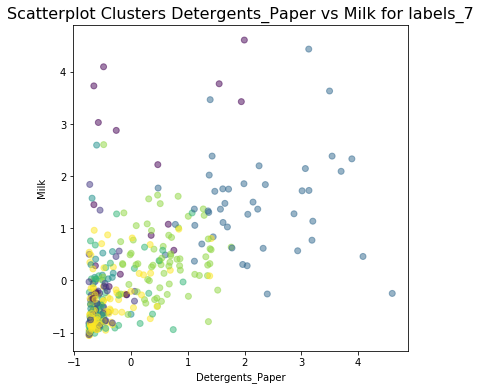

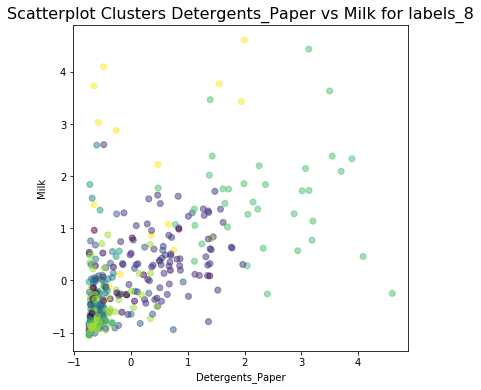

In [65]:
labels = ['labels_2', 'labels_3', 'labels_4', 'labels_5', 'labels_6', 'labels_7', 'labels_8']
for label in labels:
    scater_pairs(customers_scale_km,'Detergents_Paper','Milk',label)

<font color='blue'>For 'Detergents_Paper' vs 'Milk' K=3 seams to be the best option
</font>

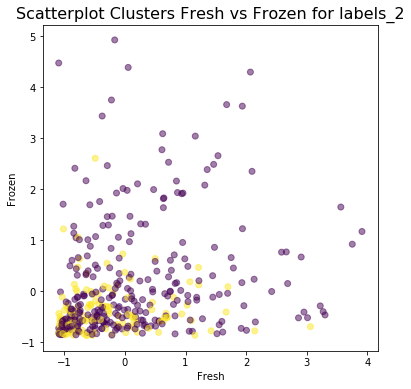

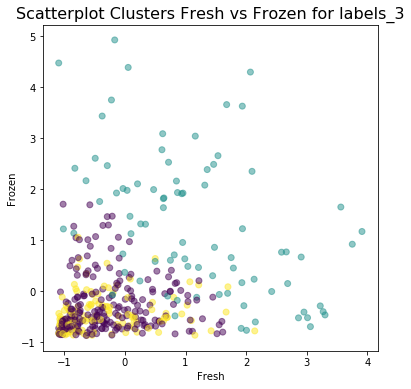

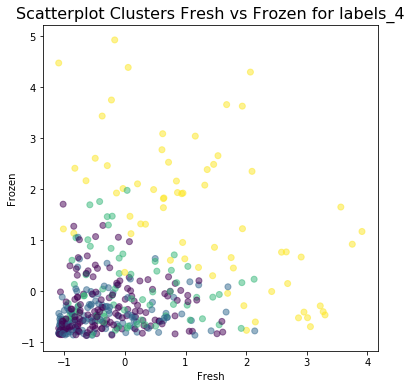

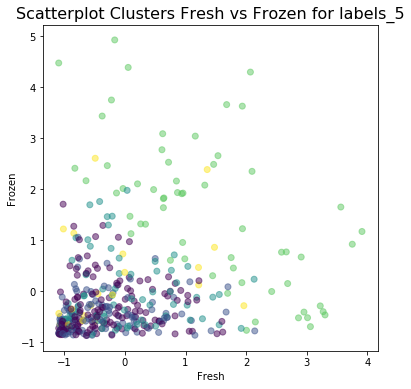

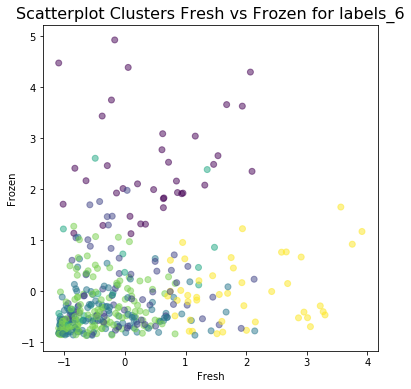

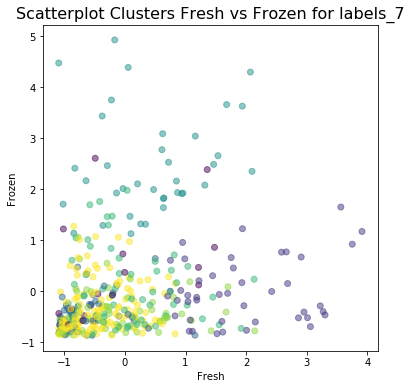

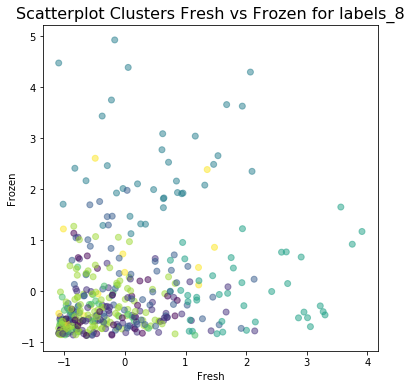

In [66]:
labels = ['labels_2', 'labels_3', 'labels_4', 'labels_5', 'labels_6', 'labels_7', 'labels_8']
for label in labels:
    scater_pairs(customers_scale_km,'Fresh','Frozen',label)

<font color='blue'>For 'Fresh' vs 'Frozen' K=3 seams to be the best option
</font>

<font color='blue'>A pairplot with hue can also help in the visualization of the problem
</font>

In [67]:
customers_scale_km2 = customers_scale_km.iloc[:,2:8].copy()

In [68]:
customers_scale_km2.head()

Fresh      Milk    Frozen  Detergents_Paper  Delicassen  labels_2
0  0.199569  1.051409 -0.801844          0.093798    0.082291         1
1 -0.372655  1.085254 -0.270462          0.286944    0.442510         1
2 -0.444438  0.865042 -0.049739          0.356526    5.432937         1
3  0.260340 -0.807866  1.322997         -0.582369    0.452379         0
4  1.213706  0.118255  0.468598         -0.186092    3.246130         1

<font color='blue'>pairplot for labels_2, aka k=2
</font>

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


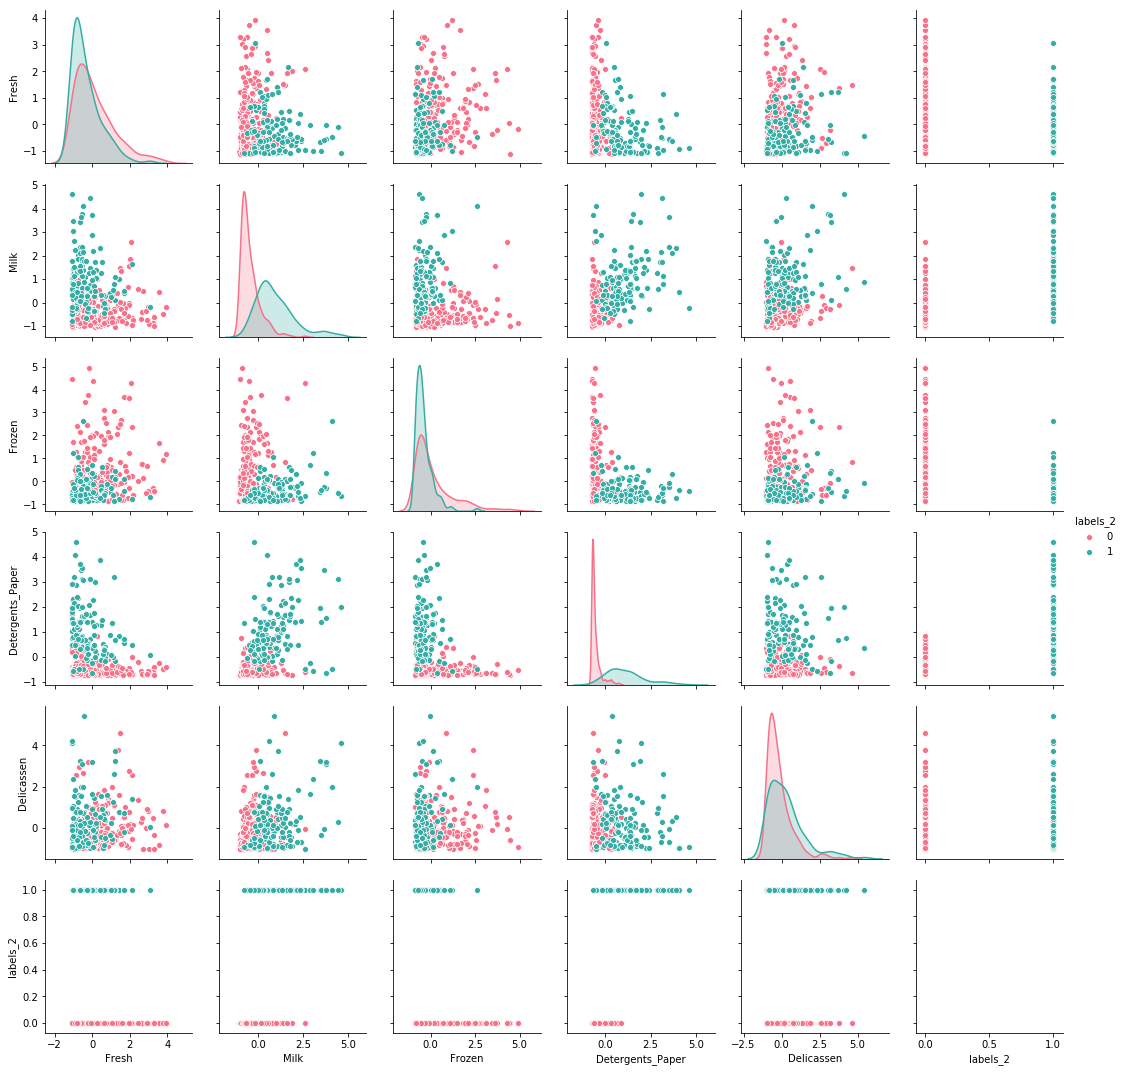

In [69]:
sns.pairplot(customers_scale_km2, hue='labels_2', palette="husl")
plt.show()

In [70]:
customers_scale_km3 = customers_scale_km.iloc[:, np.r_[2:7,8]].copy()
customers_scale_km3.head()

Fresh      Milk    Frozen  Detergents_Paper  Delicassen  labels_3
0  0.199569  1.051409 -0.801844          0.093798    0.082291         2
1 -0.372655  1.085254 -0.270462          0.286944    0.442510         2
2 -0.444438  0.865042 -0.049739          0.356526    5.432937         2
3  0.260340 -0.807866  1.322997         -0.582369    0.452379         1
4  1.213706  0.118255  0.468598         -0.186092    3.246130         1

<font color='blue'>pairplot for labels_3, aka k=3
</font>

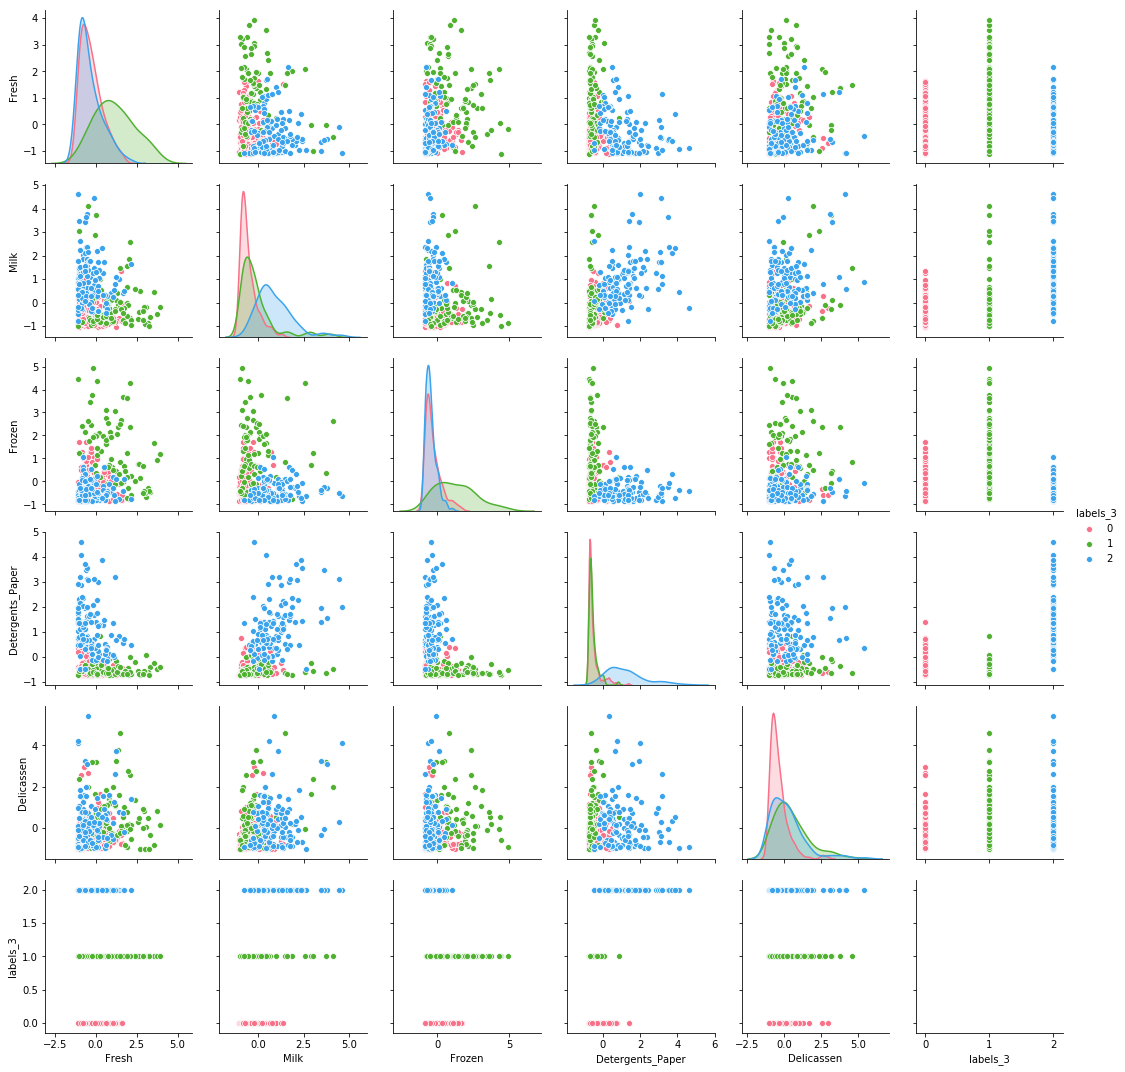

In [71]:
sns.pairplot(customers_scale_km3, hue='labels_3', palette="husl")
plt.show()

In [72]:
customers_scale_km4 = customers_scale_km.iloc[:, np.r_[2:7,9]].copy()
customers_scale_km4.head()

Fresh      Milk    Frozen  Detergents_Paper  Delicassen  labels_4
0  0.199569  1.051409 -0.801844          0.093798    0.082291         1
1 -0.372655  1.085254 -0.270462          0.286944    0.442510         1
2 -0.444438  0.865042 -0.049739          0.356526    5.432937         1
3  0.260340 -0.807866  1.322997         -0.582369    0.452379         3
4  1.213706  0.118255  0.468598         -0.186092    3.246130         3

<font color='blue'>pairplot for labels_4, aka k=4
</font>

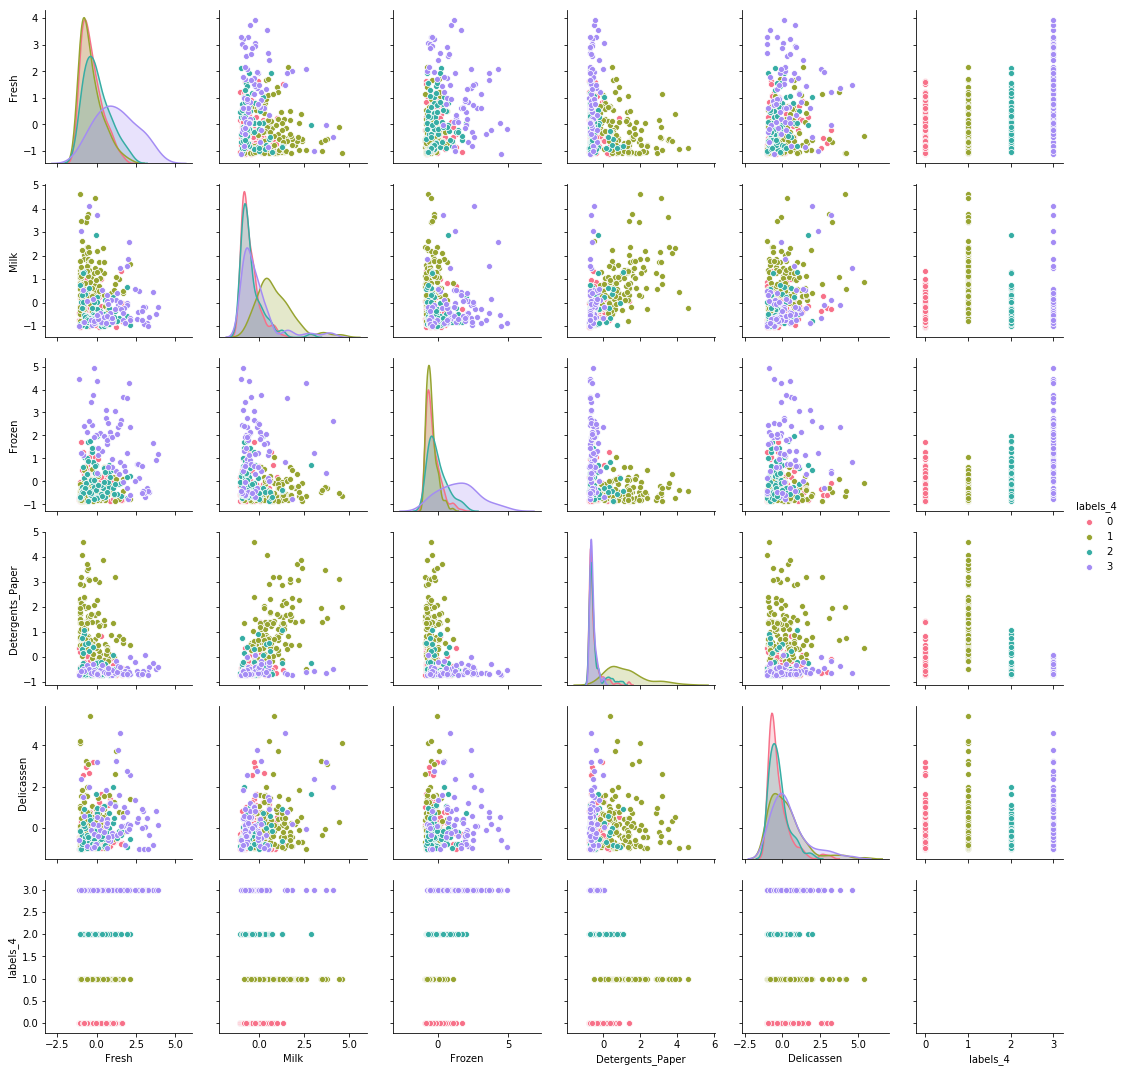

In [73]:
sns.pairplot(customers_scale_km4, hue='labels_4', palette="husl")
plt.show()

In [74]:
customers_scale_km5 = customers_scale_km.iloc[:, np.r_[2:7,10]].copy()
customers_scale_km5.head()

Fresh      Milk    Frozen  Detergents_Paper  Delicassen  labels_5
0  0.199569  1.051409 -0.801844          0.093798    0.082291         1
1 -0.372655  1.085254 -0.270462          0.286944    0.442510         1
2 -0.444438  0.865042 -0.049739          0.356526    5.432937         4
3  0.260340 -0.807866  1.322997         -0.582369    0.452379         3
4  1.213706  0.118255  0.468598         -0.186092    3.246130         4

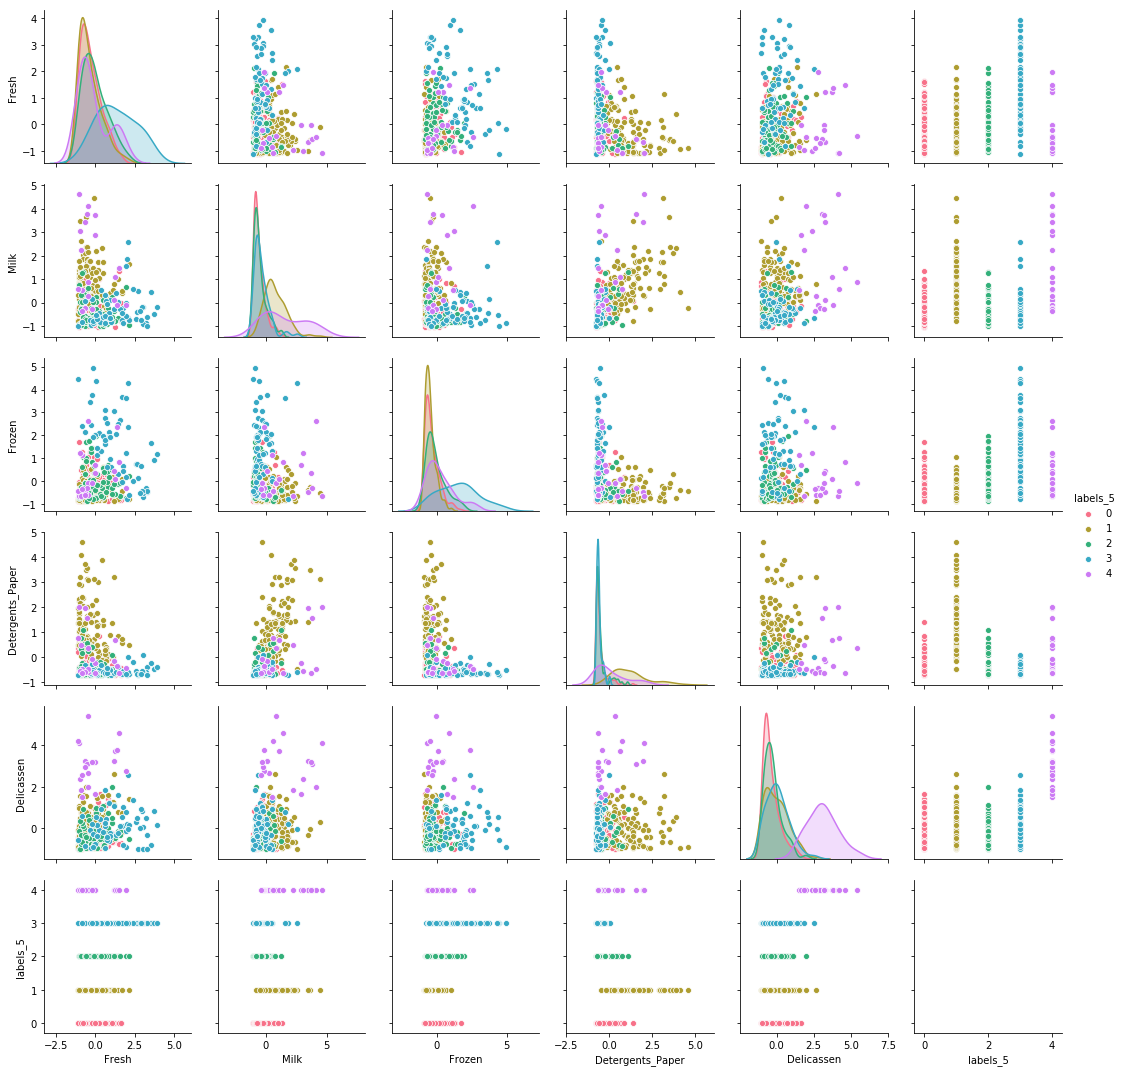

In [75]:
sns.pairplot(customers_scale_km5, hue='labels_5', palette="husl")
plt.show()

<font color='blue'>From the pairplots, I think k=2 is the best fit
</font>

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

<font color='blue'>Testing with different eps
</font>

In [76]:
eps=[0.1, 0.5, 1, 10]

In [77]:
customers_scale_dbs = customers_scale.iloc[:,:-2].copy()

In [78]:
customers_scale_dbs.iloc[:,:7].head()

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
0  1.478044  0.587722  0.199569  1.051409 -0.801844          0.093798   
1  1.478044  0.587722 -0.372655  1.085254 -0.270462          0.286944   
2  1.478044  0.587722 -0.444438  0.865042 -0.049739          0.356526   
3 -0.676570  0.587722  0.260340 -0.807866  1.322997         -0.582369   
4  1.478044  0.587722  1.213706  0.118255  0.468598         -0.186092   

   Delicassen  
0    0.082291  
1    0.442510  
2    5.432937  
3    0.452379  
4    3.246130

In [79]:
for i in eps: #create a column of labels for each value of eps
    dbscan_eps = DBSCAN(eps=i).fit(customers_scale_dbs.iloc[:,:7])
    label = f'labels_eps_{i}'
    customers_scale_dbs[label] = dbscan_eps.labels_

In [80]:
customers_scale_dbs.head()

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
0  1.478044  0.587722  0.199569  1.051409 -0.801844          0.093798   
1  1.478044  0.587722 -0.372655  1.085254 -0.270462          0.286944   
2  1.478044  0.587722 -0.444438  0.865042 -0.049739          0.356526   
3 -0.676570  0.587722  0.260340 -0.807866  1.322997         -0.582369   
4  1.478044  0.587722  1.213706  0.118255  0.468598         -0.186092   

   Delicassen  labels_eps_0.1  labels_eps_0.5  labels_eps_1  labels_eps_10  
0    0.082291              -1              -1             0              0  
1    0.442510              -1              -1             0              0  
2    5.432937              -1              -1            -1              0  
3    0.452379              -1              -1             1              0  
4    3.246130              -1              -1            -1              0

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


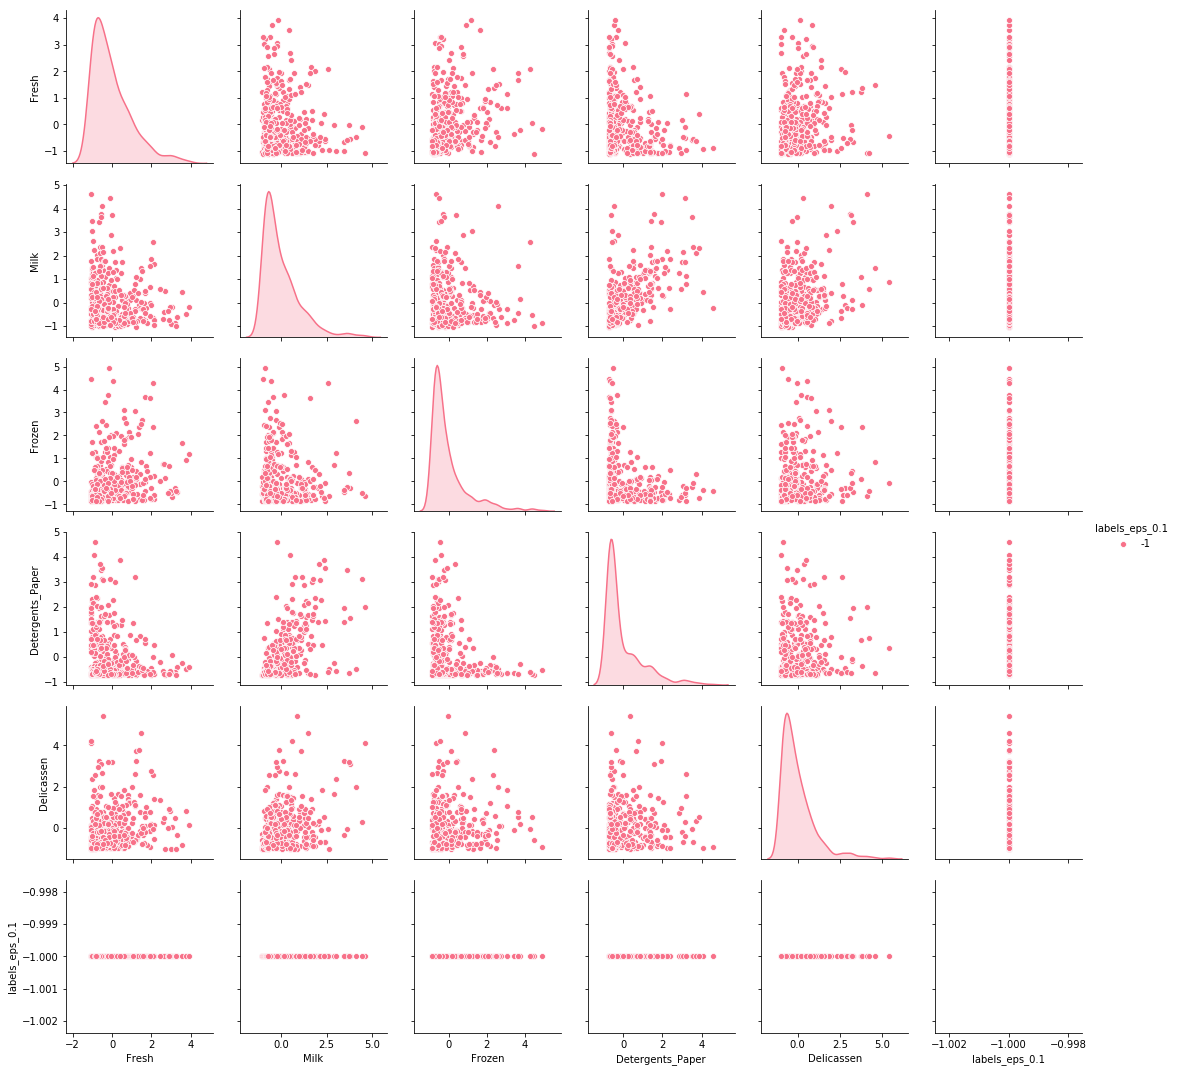

In [81]:
sns.pairplot(customers_scale_dbs.iloc[:,2:8], hue='labels_eps_0.1', palette="husl")
plt.show()

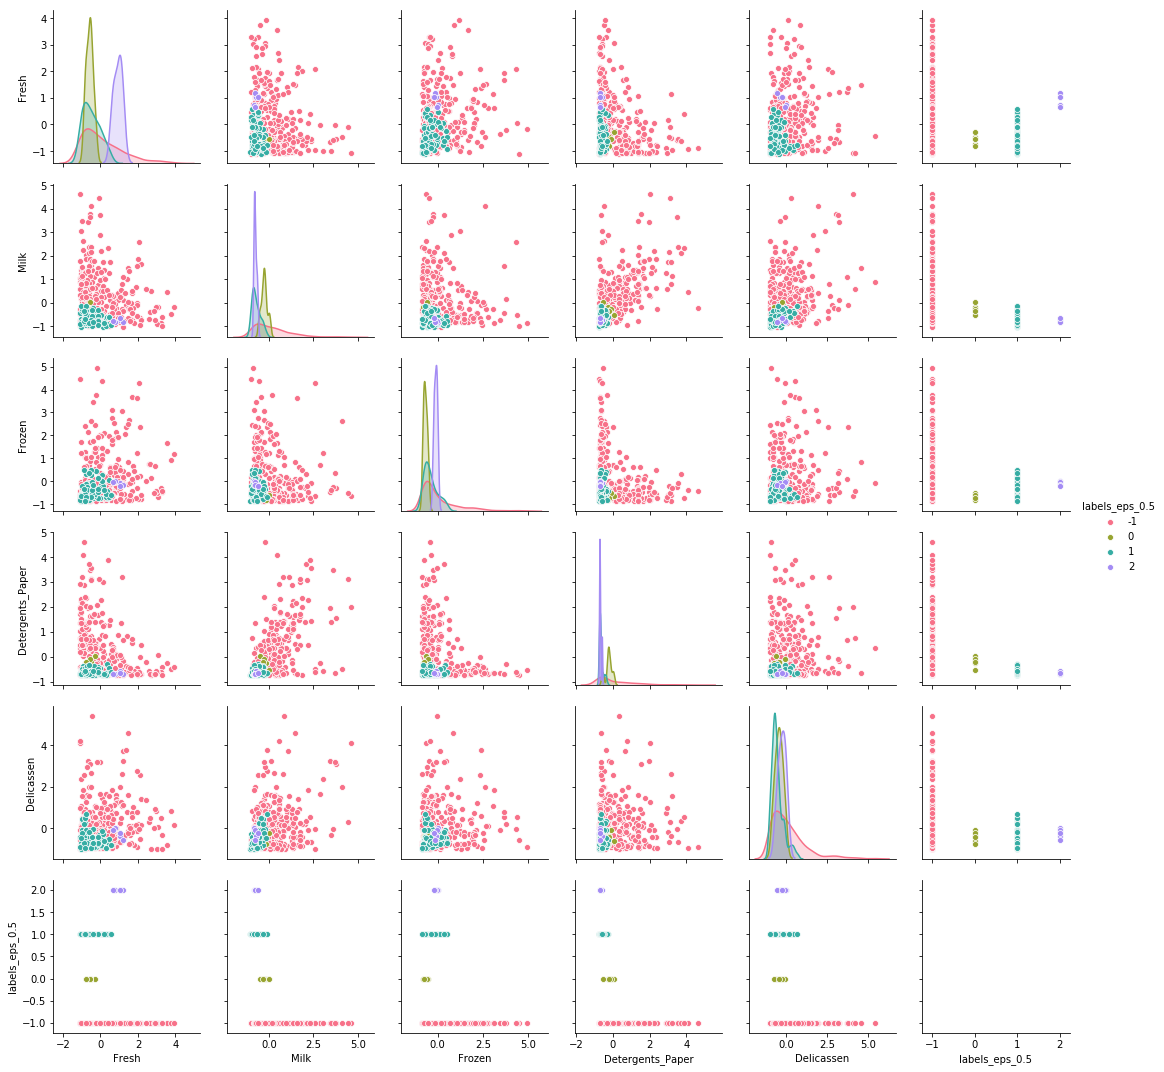

In [82]:
sns.pairplot(customers_scale_dbs.iloc[:,np.r_[2:7,8]], hue='labels_eps_0.5', palette="husl")
plt.show()

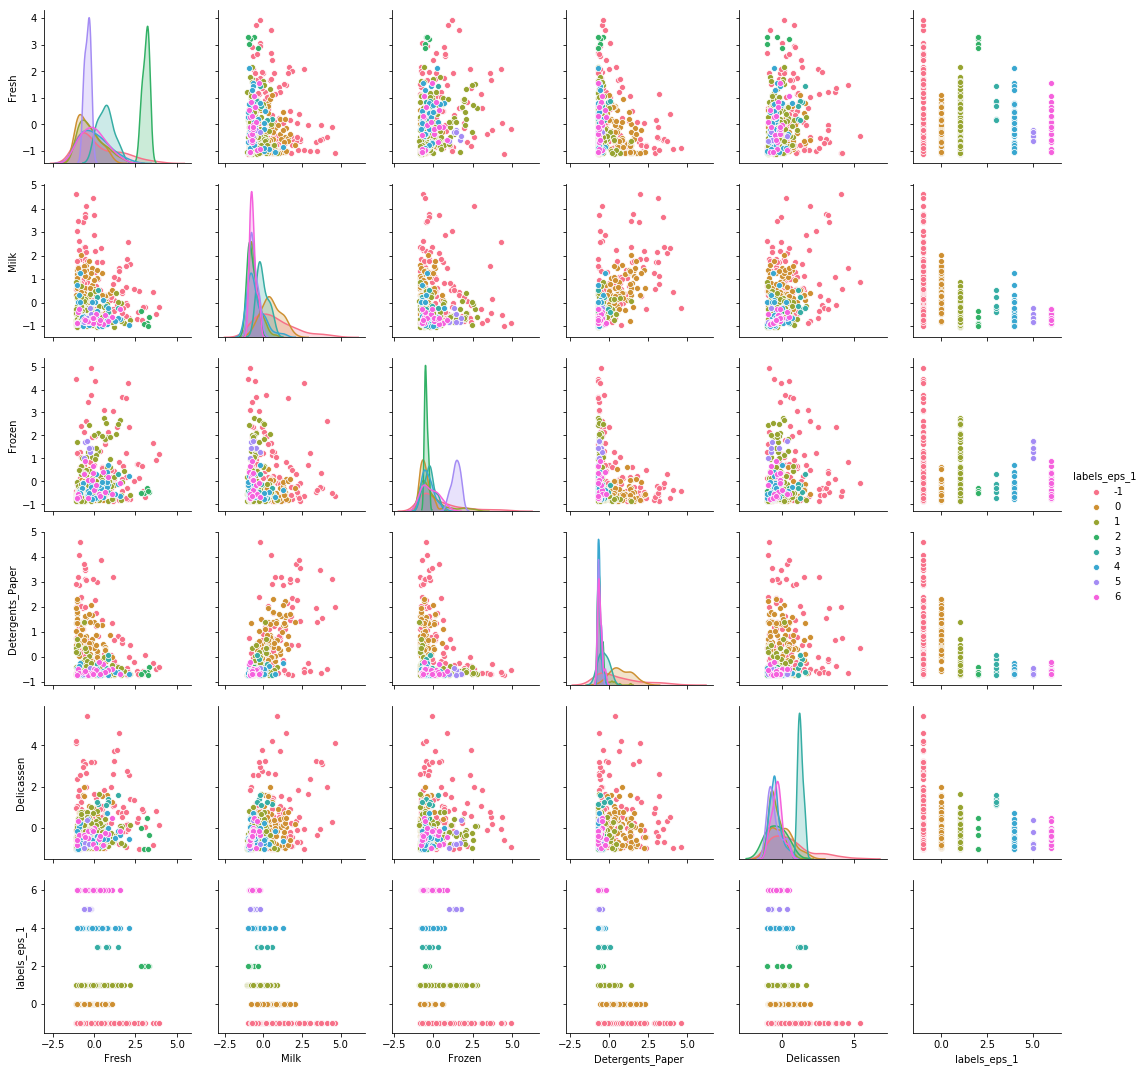

In [83]:
sns.pairplot(customers_scale_dbs.iloc[:,np.r_[2:7,9]], hue='labels_eps_1', palette="husl")
plt.show()

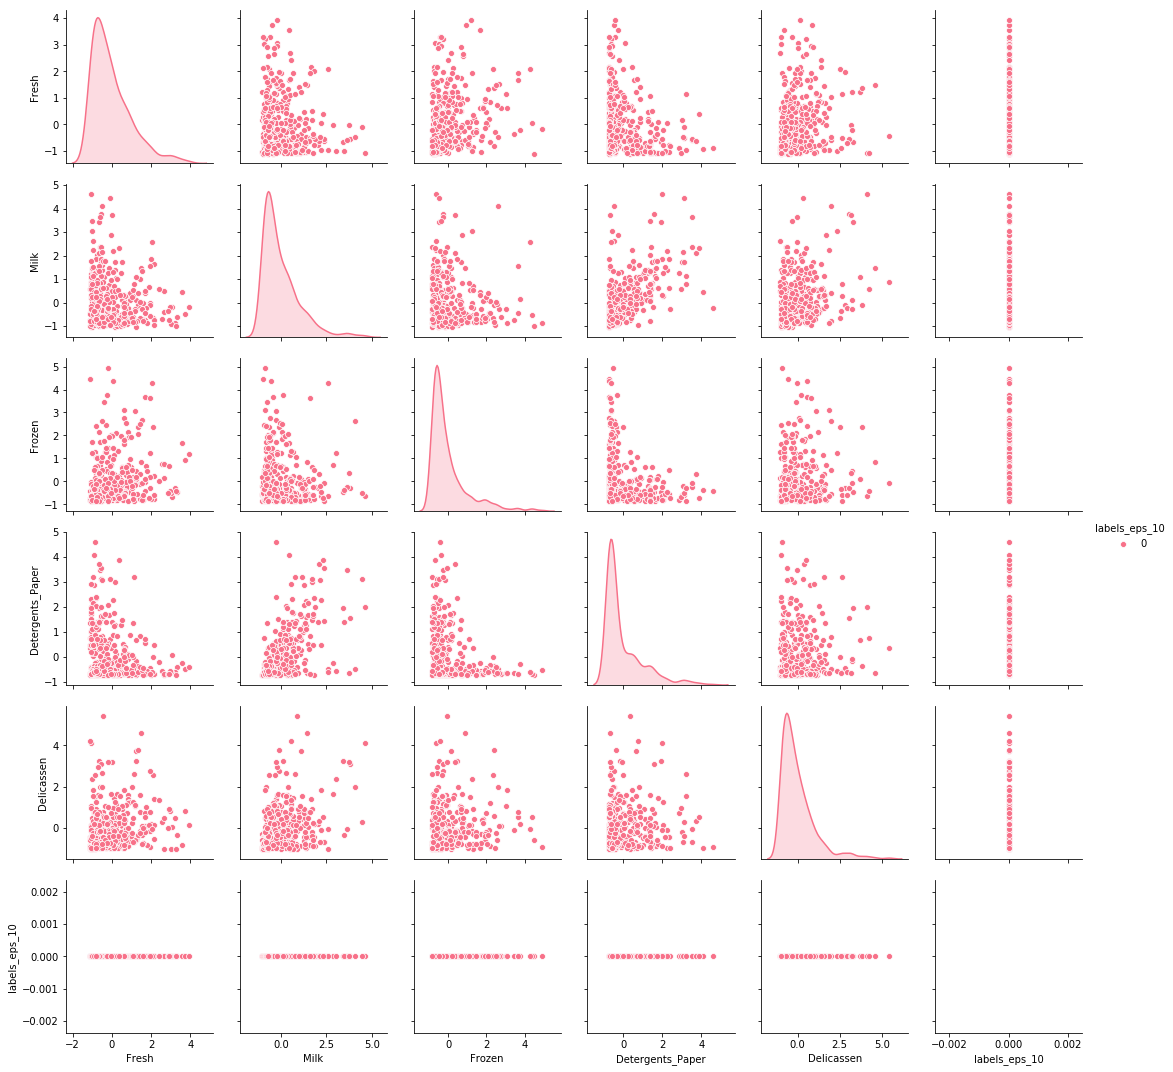

In [84]:
sns.pairplot(customers_scale_dbs.iloc[:,np.r_[2:7,10]], hue='labels_eps_10', palette="husl")
plt.show()

<font color='blue'>Conclusion if ir is too big o too small, we only get 1 cluster
</font>

<font color='blue'>Testing different mean samples
</font>

In [85]:
min_s=[2, 5, 10, 20]

In [86]:
customers_scale_ms = customers_scale.iloc[:,:-2].copy()

In [87]:
for j in min_s: #create a column of labels for each value of min sample
    dbscan_min_s = DBSCAN(eps=0.5, min_samples=j).fit(customers_scale_ms.iloc[:,:7])
    label = f'labels_ms_{j}'
    customers_scale_ms[label] = dbscan_min_s.labels_

In [88]:
customers_scale_ms.head()

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
0  1.478044  0.587722  0.199569  1.051409 -0.801844          0.093798   
1  1.478044  0.587722 -0.372655  1.085254 -0.270462          0.286944   
2  1.478044  0.587722 -0.444438  0.865042 -0.049739          0.356526   
3 -0.676570  0.587722  0.260340 -0.807866  1.322997         -0.582369   
4  1.478044  0.587722  1.213706  0.118255  0.468598         -0.186092   

   Delicassen  labels_ms_2  labels_ms_5  labels_ms_10  labels_ms_20  
0    0.082291           -1           -1            -1            -1  
1    0.442510           -1           -1            -1            -1  
2    5.432937           -1           -1            -1            -1  
3    0.452379            0           -1            -1            -1  
4    3.246130           -1           -1            -1            -1

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


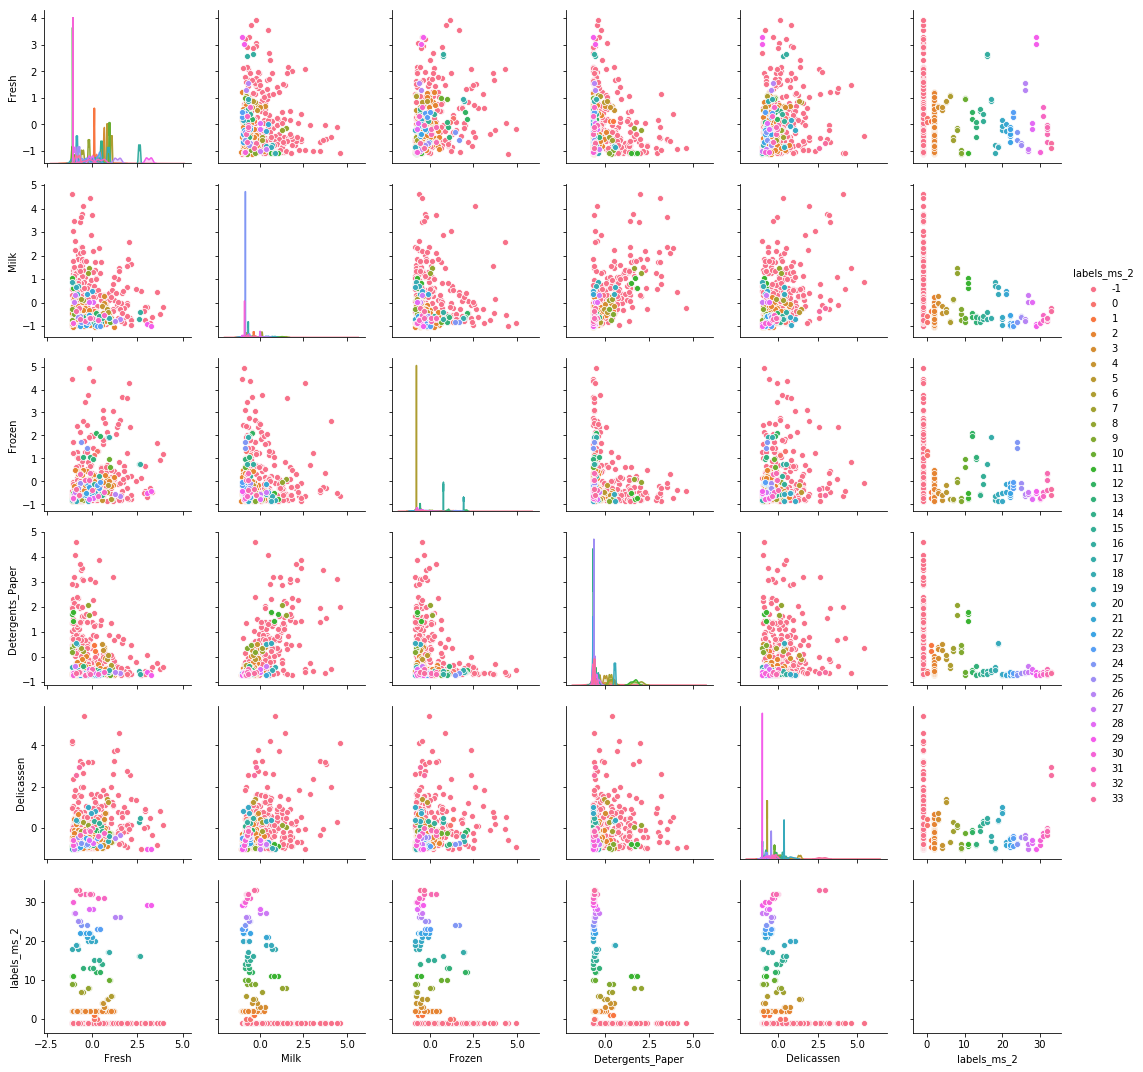

In [89]:
sns.pairplot(customers_scale_ms.iloc[:,2:8], hue='labels_ms_2', palette="husl")
plt.show()

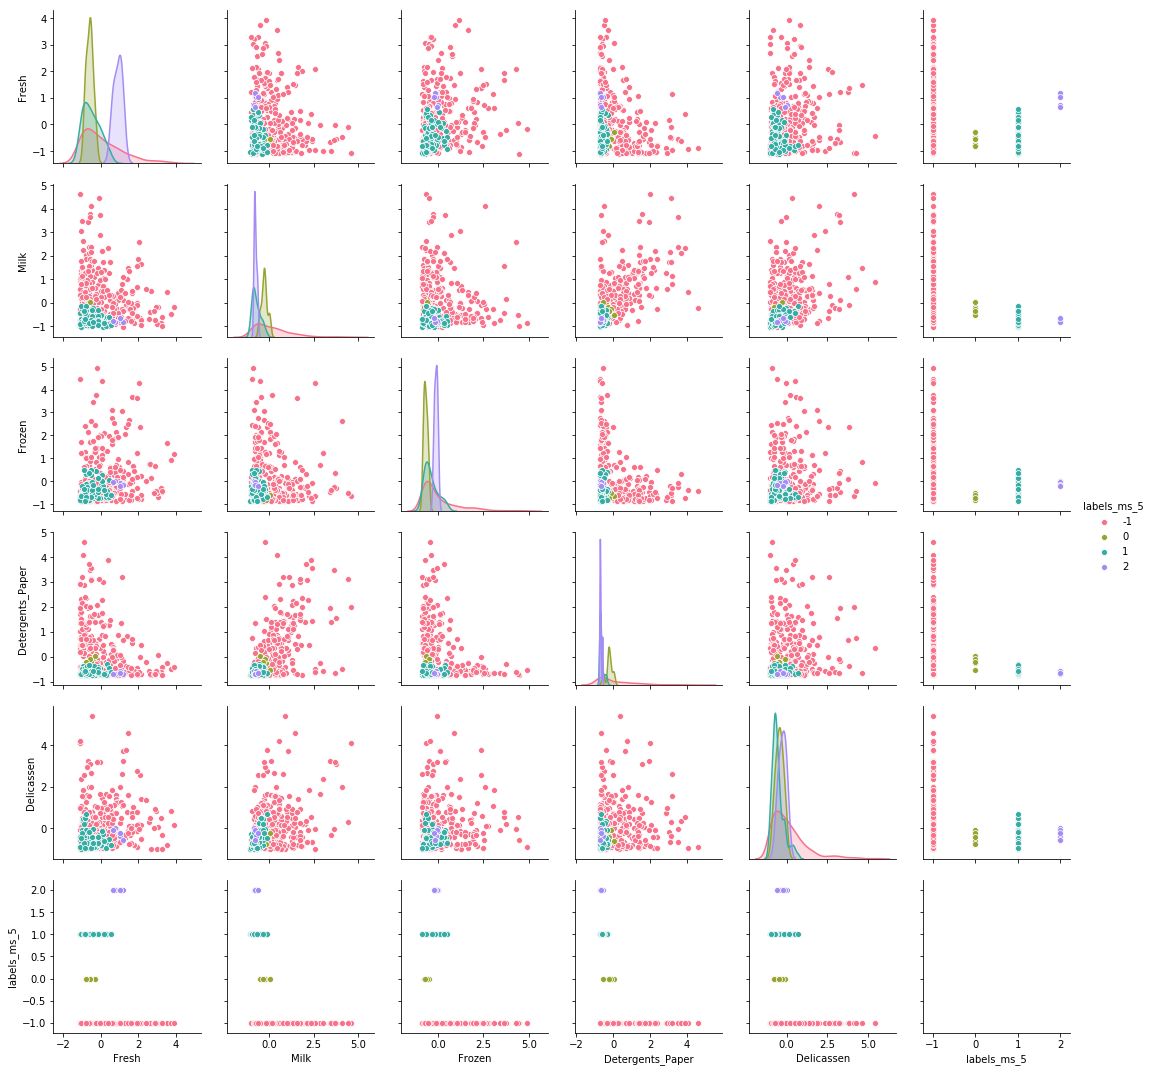

In [90]:
sns.pairplot(customers_scale_ms.iloc[:,np.r_[2:7,8]], hue='labels_ms_5', palette="husl")
plt.show()

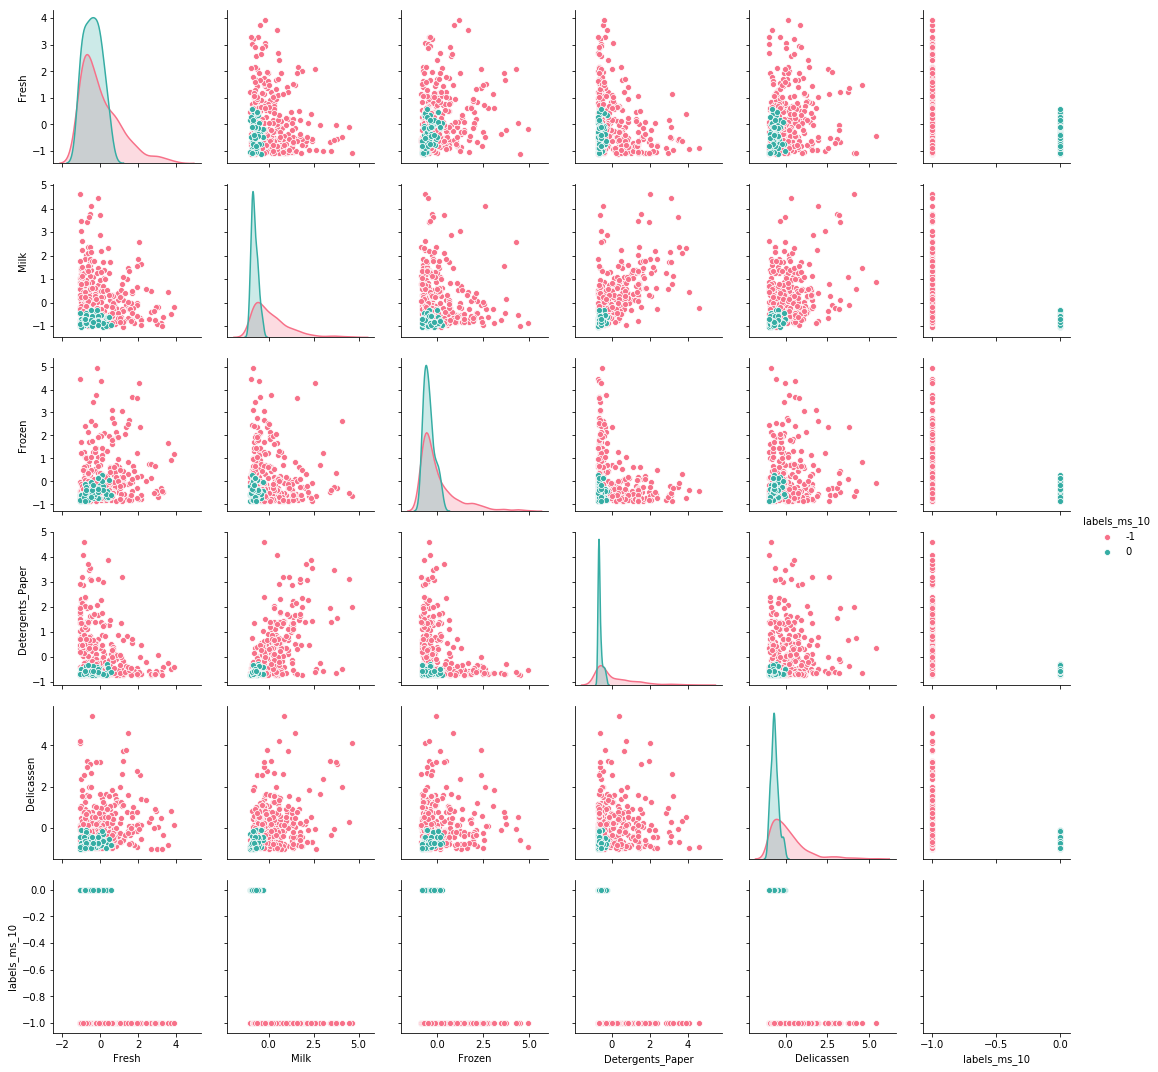

In [91]:
sns.pairplot(customers_scale_ms.iloc[:,np.r_[2:7,9]], hue='labels_ms_10', palette="husl")
plt.show()

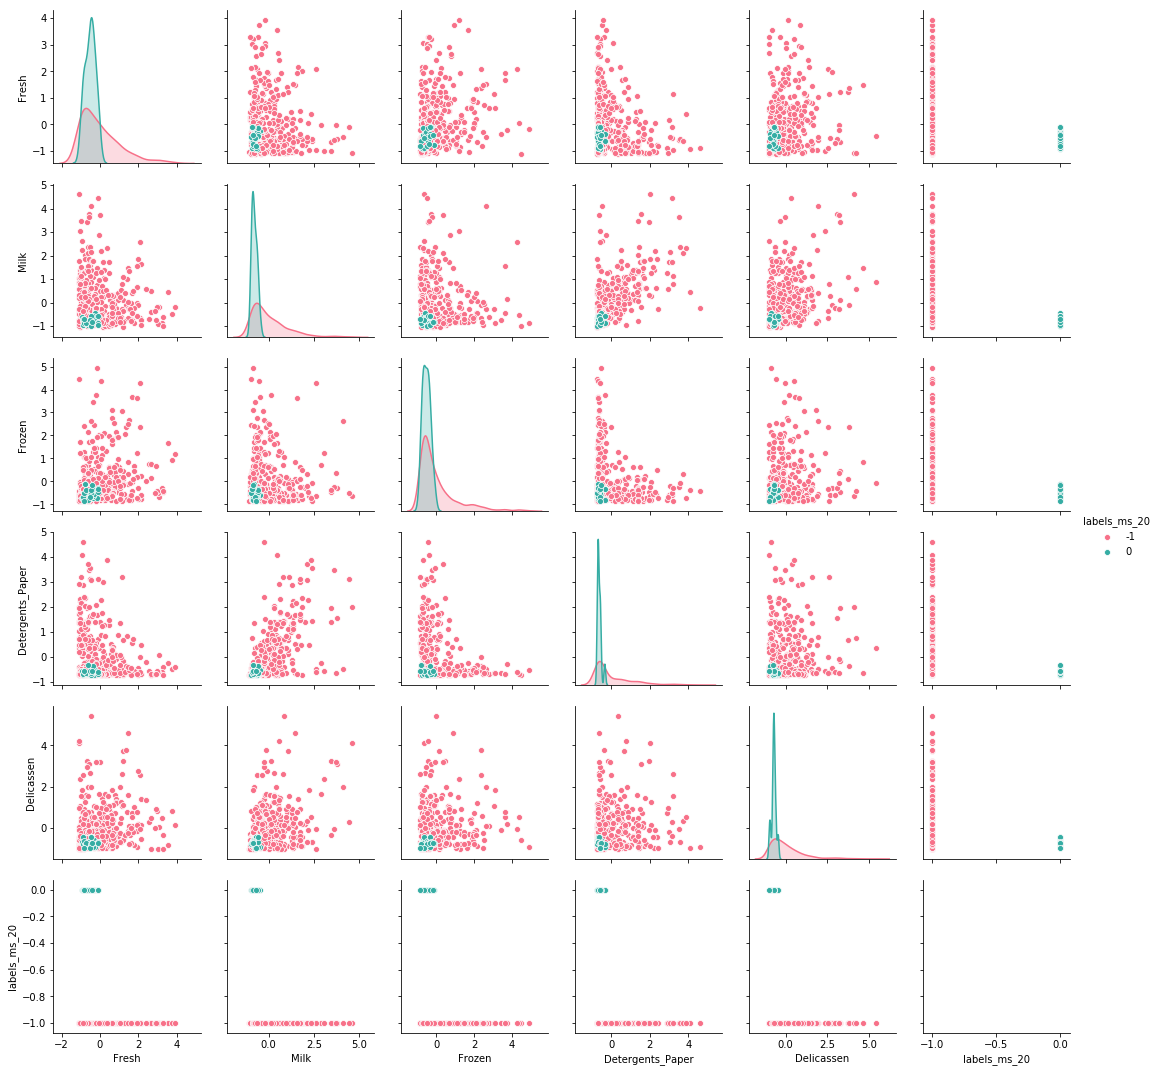

In [92]:
sns.pairplot(customers_scale_ms.iloc[:,np.r_[2:7,10]], hue='labels_ms_20', palette="husl")
plt.show()

<font color='blue'>In this case 2 is too small, ant there are to many clusters.
But 10 seams a good fit for the value
</font>